In [2]:
pip install maup

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import geopandas as gpd
import maup
import time

In [46]:
# start_time = time.time()
# population_df = gpd.read_file("./ct_pl2020_b/ct_pl2020_p2_b.shp")
# end_time = time.time()
# print("The time to import ct_pl2020_p2_b.shp is:",
#       (end_time-start_time)/60, "mins")

In [47]:
# Voting age population

In [48]:
# start_time = time.time()
# vap_df= gpd.read_file("./ct_pl2020_b/ct_pl2020_p4_b.shp")
# end_time = time.time()
# print("The time to import ct_pl2020_p4_b.shp is:",
#       (end_time-start_time)/60, "mins")

In [49]:
# start_time = time.time()
# election_df = gpd.read_file("./ct_vest_20/ct_vest_20.shp")
# end_time = time.time()
# print("The time to import ct_vest_20.shp is:",
#       (end_time-start_time)/60, "mins")

In [50]:
# start_time = time.time()
# cong_df = gpd.read_file("./ct_cong_adopted_2022/Districts_1 2022-02-14.shp")
# end_time = time.time()
# print("The time to import Districts_1 2022-02-14.shp shape is:",
#       (end_time-start_time)/60, "mins")

In [51]:
# cong_df.shape

In [52]:
# print(population_df.columns)
# print(vap_df.columns)
# print(election_df.columns)
# print(cong_df.columns)

In [53]:
# print(cong_df)

In [54]:
# cong_df = cong_df[:-1]  # Remove the last row
# cong_df = cong_df[['ID', 'DISTRICT', 'geometry']]  # Keep only DISTRICT, ID, and geometry columns

In [55]:
# # refactored cong_df:
# print(cong_df)

In [56]:
# # Save the DataFrame to a pickle file
# population_df.to_pickle("population_df.pkl")
# vap_df.to_pickle("vap_df.pkl")
# election_df.to_pickle("election_df.pkl")
# cong_df.to_pickle("cong_df.pkl")

In [57]:
# We can comment everything else above because now we saved our dataframes so we
# no longer need to keep importing

In [71]:
population_df = pd.read_pickle("population_df.pkl")
vap_df = pd.read_pickle("vap_df.pkl")
election_df = pd.read_pickle("election_df.pkl")
cong_df = pd.read_pickle("cong_df.pkl")

In [72]:
print(population_df.columns)
print(vap_df.columns)
print(election_df.columns)
print(cong_df.columns)

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

# Put data into geometry units

In [73]:
# connecticut crs is 26956
population_df = population_df.to_crs(epsg=26956)
vap_df = vap_df.to_crs(epsg=26956)
election_df = election_df.to_crs(epsg=26956)

In [74]:
blocks_to_precincts_assignment = maup.assign(population_df.geometry, election_df.geometry)
vap_blocks_to_precincts_assignment = maup.assign(vap_df.geometry, election_df.geometry)

In [75]:
pop_column_names = ['P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007',
                    'P0020008', 'P0020009', 'P0020010', 'P0020011']

In [76]:
vap_column_names = ['P0040001', 'P0040002', 'P0040005', 'P0040006', 'P0040007',
                    'P0040008', 'P0040009', 'P0040010', 'P0040011']

We'll put all of the population columns into the election dataframe

In [77]:
for name in pop_column_names:
    election_df[name] = population_df[name].groupby(blocks_to_precincts_assignment).sum()
for name in vap_column_names:
    election_df[name] = vap_df[name].groupby(vap_blocks_to_precincts_assignment).sum()

Let's check to make sure we didn't lose anyone.

In [78]:
print(population_df['P0020001'].sum())
print(election_df['P0020001'].sum())
print(vap_df['P0040001'].sum())
print(election_df['P0040001'].sum())

3605944
3605944.0
2869227
2869227.0


In [79]:
print(maup.doctor(election_df))

There are 18 overlaps.
There are 2 holes.
There are some invalid geometries.
False


In [80]:
# election_df = maup.quick_repair(election_df)

In [81]:
election_df = maup.smart_repair(election_df)

/Users/blaydeomura/miniconda3/envs/gerry/lib/python3.11/site-packages/maup/smart_repair.py:95: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][i] = shapely.wkb.loads(
/Users/blaydeomura/miniconda3/envs/gerry/lib/pytho

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.


/Users/blaydeomura/miniconda3/envs/gerry/lib/python3.11/site-packages/maup/smart_repair.py:372: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pieces_df["polygon indices"][i] = set()
/Users/blaydeomura/miniconda3/envs/gerry/lib/python3.11/sit

Identifying overlaps...
Resolving overlaps...


/Users/blaydeomura/miniconda3/envs/gerry/lib/python3.11/site-packages/maup/smart_repair.py:487: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][this_poly_ind] = unary_union([geometries_df["geometry"][this_poly_ind], t

Assigning order 2 pieces...
Assigning order 3 pieces...
Filling gaps...


Gaps to simplify:   0%|                                   | 0/2 [00:00<?, ?it/s]/Users/blaydeomura/miniconda3/envs/gerry/lib/python3.11/site-packages/maup/smart_repair.py:1207: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  holes_df.geometry[

In [82]:
print(maup.doctor(election_df))

True


# Get districts assignment and put it into dataframe

In [84]:
cong_df = cong_df.to_crs(epsg=26956)

In [85]:
precincts_to_districts_assignment = maup.assign(election_df.geometry, cong_df.geometry)
election_df["CD"] = precincts_to_districts_assignment

In [87]:
district_col_name = "DISTRICT"

In [88]:
print(set(election_df["CD"]))
for precinct_index in range(len(election_df)):
    election_df.at[precinct_index, "CD"] = cong_df.at[election_df.at[precinct_index, "CD"], district_col_name]
print(set(cong_df[district_col_name]))
print(set(election_df["CD"]))

{0, 1, 2, 3, 4}
{'5', '1', '3', '4', '2'}
{'5', '1', '3', '4', '2'}


/var/folders/8v/_dv8pl_n0nv2335c5f2bkdnr0000gn/T/ipykernel_25400/674538680.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  election_df.at[precinct_index, "CD"] = cong_df.at[election_df.at[precinct_index, "CD"], district_col_name]


In [89]:
rename_dict = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                    'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0020011': 'NH_2MORE',
                    'P0040001': 'VAP', 'P0040002': 'HVAP', 'P0040005': 'WVAP', 'P0040006': 'BVAP', 'P0040007': 'AMINVAP',
                                        'P0040008': 'ASIANVAP', 'P0040009': 'NHPIVAP', 'P0040010': 'OTHERVAP', 'P0040011': '2MOREVAP',
                                        'G20PREDBID': 'G20PRED', 'G20PRERTRU': 'G20PRER', 'G20USSDDUR': 'G20USSD', 
                                        'G20USSRCUR': 'G20USSR'}

In [90]:
list(election_df.columns)

['STATEFP20',
 'COUNTYFP20',
 'NAME20',
 'G20PREDBID',
 'G20PRERTRU',
 'G20PRELJOR',
 'G20PREGHAW',
 'G20PREOWRI',
 'geometry',
 'P0020001',
 'P0020002',
 'P0020005',
 'P0020006',
 'P0020007',
 'P0020008',
 'P0020009',
 'P0020010',
 'P0020011',
 'P0040001',
 'P0040002',
 'P0040005',
 'P0040006',
 'P0040007',
 'P0040008',
 'P0040009',
 'P0040010',
 'P0040011',
 'CD']

In [91]:
election_df.rename(columns=rename_dict, inplace = True)

In [92]:
list(election_df.columns)

['STATEFP20',
 'COUNTYFP20',
 'NAME20',
 'G20PRED',
 'G20PRER',
 'G20PRELJOR',
 'G20PREGHAW',
 'G20PREOWRI',
 'geometry',
 'TOTPOP',
 'HISP',
 'NH_WHITE',
 'NH_BLACK',
 'NH_AMIN',
 'NH_ASIAN',
 'NH_NHPI',
 'NH_OTHER',
 'NH_2MORE',
 'VAP',
 'HVAP',
 'WVAP',
 'BVAP',
 'AMINVAP',
 'ASIANVAP',
 'NHPIVAP',
 'OTHERVAP',
 '2MOREVAP',
 'CD']

In [93]:
election_df.drop(columns=[ 'G20PRELJOR','G20PREGHAW','G20PREOWRI'], inplace=True)
list(election_df.columns)

['STATEFP20',
 'COUNTYFP20',
 'NAME20',
 'G20PRED',
 'G20PRER',
 'geometry',
 'TOTPOP',
 'HISP',
 'NH_WHITE',
 'NH_BLACK',
 'NH_AMIN',
 'NH_ASIAN',
 'NH_NHPI',
 'NH_OTHER',
 'NH_2MORE',
 'VAP',
 'HVAP',
 'WVAP',
 'BVAP',
 'AMINVAP',
 'ASIANVAP',
 'NHPIVAP',
 'OTHERVAP',
 '2MOREVAP',
 'CD']

<Axes: >

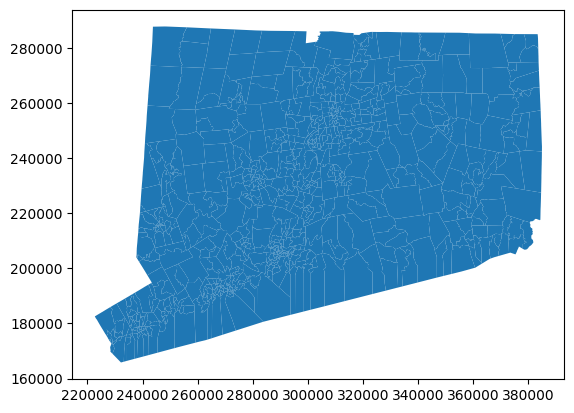

In [94]:
election_df.plot()

In [99]:
# Convert to string and strip spaces, then convert to numeric
election_df["CD"] = pd.to_numeric(election_df["CD"].astype(str).str.strip(), errors='coerce')

In [100]:
print(election_df.loc[election_df["CD"] == 1, "TOTPOP"].sum())
print(election_df.loc[election_df["CD"] == 2, "TOTPOP"].sum())
pop_vals = [election_df.loc[election_df["CD"] == n, "TOTPOP"].sum() for n in range(1, 6)]
print(pop_vals)

715659.0
725372.0
[715659.0, 725372.0, 717651.0, 726330.0, 720932.0]


In [103]:
# election_df.to_file("./CT/CT.shp")

In [104]:
missing_percentage = election_df.isnull().mean() * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
STATEFP20     0.000000
COUNTYFP20    0.000000
NAME20        0.000000
G20PRED       0.000000
G20PRER       0.000000
geometry      0.000000
TOTPOP        0.269906
HISP          0.269906
NH_WHITE      0.269906
NH_BLACK      0.269906
NH_AMIN       0.269906
NH_ASIAN      0.269906
NH_NHPI       0.269906
NH_OTHER      0.269906
NH_2MORE      0.269906
VAP           0.269906
HVAP          0.269906
WVAP          0.269906
BVAP          0.269906
AMINVAP       0.269906
ASIANVAP      0.269906
NHPIVAP       0.269906
OTHERVAP      0.269906
2MOREVAP      0.269906
CD            0.000000
dtype: float64


In [105]:
# Show rows with missing values
rows_with_missing_values = election_df[election_df.isnull().any(axis=1)]
print("\nRows with missing values:")
print(rows_with_missing_values)

# Show columns with missing values
columns_with_missing_values = election_df.columns[election_df.isnull().any()]
print("\nColumns with missing values:")
print(columns_with_missing_values)


Rows with missing values:
    STATEFP20 COUNTYFP20             NAME20  G20PRED  G20PRER  \
508        09        009  East Haven 001-03       80       71   
509        09        009  East Haven 005-03       41       38   

                                              geometry  TOTPOP  HISP  \
508  POLYGON ((294683.292 201878.313, 294686.998 20...     NaN   NaN   
509  POLYGON ((296702.792 206791.121, 296738.023 20...     NaN   NaN   

     NH_WHITE  NH_BLACK  ...  VAP  HVAP  WVAP  BVAP  AMINVAP  ASIANVAP  \
508       NaN       NaN  ...  NaN   NaN   NaN   NaN      NaN       NaN   
509       NaN       NaN  ...  NaN   NaN   NaN   NaN      NaN       NaN   

     NHPIVAP  OTHERVAP  2MOREVAP  CD  
508      NaN       NaN       NaN   3  
509      NaN       NaN       NaN   3  

[2 rows x 25 columns]

Columns with missing values:
Index(['TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN',
       'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP',
       'AMINVAP', 'ASI

In [106]:
election_df.fillna(0, inplace=True)

In [107]:
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
STATEFP20     0.000000
COUNTYFP20    0.000000
NAME20        0.000000
G20PRED       0.000000
G20PRER       0.000000
geometry      0.000000
TOTPOP        0.269906
HISP          0.269906
NH_WHITE      0.269906
NH_BLACK      0.269906
NH_AMIN       0.269906
NH_ASIAN      0.269906
NH_NHPI       0.269906
NH_OTHER      0.269906
NH_2MORE      0.269906
VAP           0.269906
HVAP          0.269906
WVAP          0.269906
BVAP          0.269906
AMINVAP       0.269906
ASIANVAP      0.269906
NHPIVAP       0.269906
OTHERVAP      0.269906
2MOREVAP      0.269906
CD            0.000000
dtype: float64


In [108]:
rows_with_missing_values = election_df[election_df.isnull().any(axis=1)]
print("\nRows with missing values:")
print(rows_with_missing_values)

# Show columns with missing values
columns_with_missing_values = election_df.columns[election_df.isnull().any()]
print("\nColumns with missing values:")
print(columns_with_missing_values)


Rows with missing values:
Empty GeoDataFrame
Columns: [STATEFP20, COUNTYFP20, NAME20, G20PRED, G20PRER, geometry, TOTPOP, HISP, NH_WHITE, NH_BLACK, NH_AMIN, NH_ASIAN, NH_NHPI, NH_OTHER, NH_2MORE, VAP, HVAP, WVAP, BVAP, AMINVAP, ASIANVAP, NHPIVAP, OTHERVAP, 2MOREVAP, CD]
Index: []

[0 rows x 25 columns]

Columns with missing values:
Index([], dtype='object')


In [111]:
election_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP20   741 non-null    object  
 1   COUNTYFP20  741 non-null    object  
 2   NAME20      741 non-null    object  
 3   G20PRED     741 non-null    int64   
 4   G20PRER     741 non-null    int64   
 5   geometry    741 non-null    geometry
 6   TOTPOP      741 non-null    float64 
 7   HISP        741 non-null    float64 
 8   NH_WHITE    741 non-null    float64 
 9   NH_BLACK    741 non-null    float64 
 10  NH_AMIN     741 non-null    float64 
 11  NH_ASIAN    741 non-null    float64 
 12  NH_NHPI     741 non-null    float64 
 13  NH_OTHER    741 non-null    float64 
 14  NH_2MORE    741 non-null    float64 
 15  VAP         741 non-null    float64 
 16  HVAP        741 non-null    float64 
 17  WVAP        741 non-null    float64 
 18  BVAP        741 non-null    float64 
 19  

In [112]:
election_df.to_file("./CT/CT.shp")